# Задание 1.

Поработаем с датасетом Black Friday. Есть его описание:

Description

The dataset here is a sample of the transactions made in a retail store. The store wants to know better the customer purchase behaviour against different products. Specifically, here the problem is a regression problem where we are trying to predict the dependent variable (the amount of purchase) with the help of the information contained in the other variables.

Classification problem can also be settled in this dataset since several variables are categorical, and some other approaches could be "Predicting the age of the consumer" or even "Predict the category of goods bought". This dataset is also particularly convenient for clustering and maybe find different clusters of consumers within it.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pylab as plt

from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
data = pd.read_csv('BlackFriday.csv')
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


# Подготовка данных

In [3]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


Скорее всего NaN-ы в Product_Category_2 и Product_Category_3 означают, что человек не покупал продукты из этих категорий.

Поэтому можем заменить эти пропущенные значения на 0.

In [4]:
data = data.fillna(0)

In [5]:
data.shape

(537577, 12)

In [6]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


Посмотрим, какие типы данных есть в нашем датасете. 

Выведите на экран тип каждой колонки в таблице.

In [7]:
#your code here
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
dtype: object

Обработаем нечисловые колонки.

1) Выведите на экран все возможные значения из столбца Gender.

2) Замените значение 'M' на 1, а 'F' на 0.

In [9]:
#your code here
data.Gender = data.Gender.apply(lambda x: 1 if x == 'M' else 0)
# set(data.Gender)

Поработаем со столбцом Age.

1) Выведите на экран все возможные значения из столбца Age.

2) Напишите функцию для перевода каждого диапазона возрастов в число (самые маленькие возрасты - 0, следующий диапазон - 1 и т.д.). Замените значения в столбце Age на числовые, применив эту функцию.

In [11]:
set(data.Age)
#your code here

def map_age(age):
    res = {'0-17': 0, '18-25': 1, '26-35': 2, '36-45': 3, '46-50': 4, '51-55': 5, '55+': 6}
    return res[age]
    #your code here
    
data['Age'] = data['Age'].apply(map_age)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,A,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,A,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,A,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,C,4+,0,8,0.0,0.0,7969


Обработаем столбец City_Category.

1) Выведите все уникальные значения данного столбца.

2) Закодируйте столбец с помощью OneHotEncoding (get_dummies).

In [12]:
#your code here
data = pd.get_dummies(data, columns=['City_Category'], drop_first=True)
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,1,6,16,4+,0,8,0.0,0.0,7969,0,1


In [14]:
set(data.Stay_In_Current_City_Years)

{'0', '1', '2', '3', '4+'}

Наконец, обработаем Stay_In_Current_City_Years.

1) Выведите на экран все уникальные значения данного столбца.

2) Замените '4+' на 4, а все остальные значения оставьте как есть, но переведите их в числовой вид (x -> int(x)).

In [15]:
#your code here

def map_stay(years):
    return int(years.strip('+'))
    
data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)

In [17]:
data.dtypes

User_ID                         int64
Product_ID                     object
Gender                          int64
Age                             int64
Occupation                      int64
Stay_In_Current_City_Years      int64
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Product_Category_3            float64
Purchase                        int64
City_Category_B                 uint8
City_Category_C                 uint8
dtype: object

In [16]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,1000001,P00069042,0,0,10,2,0,3,0.0,0.0,8370,0,0
1,1000001,P00248942,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,1000001,P00087842,0,0,10,2,0,12,0.0,0.0,1422,0,0
3,1000001,P00085442,0,0,10,2,0,12,14.0,0.0,1057,0,0
4,1000002,P00285442,1,6,16,4,0,8,0.0,0.0,7969,0,1


Удалим столбцы User_ID и Product_ID.

In [18]:
data.drop(['User_ID', 'Product_ID'], axis=1, inplace=True)

In [19]:
data.head()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
0,0,0,10,2,0,3,0.0,0.0,8370,0,0
1,0,0,10,2,0,1,6.0,14.0,15200,0,0
2,0,0,10,2,0,12,0.0,0.0,1422,0,0
3,0,0,10,2,0,12,14.0,0.0,1057,0,0
4,1,6,16,4,0,8,0.0,0.0,7969,0,1


In [20]:
data.corr()

,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase,City_Category_B,City_Category_C
Gender,1.000000,-0.004413,0.117294,0.015392,-0.010379,-0.045661,-0.001580,0.035813,0.060086,-0.006968,0.000329
Age,-0.004413,1.000000,0.091898,-0.004754,0.312079,0.061951,0.019723,-0.006922,0.017717,-0.017499,0.109821
Occupation,0.117294,0.091898,1.000000,0.031203,0.024691,-0.008114,0.006792,0.011941,0.021104,-0.014317,0.035396
Stay_In_Current_City_Years,0.015392,-0.004754,0.031203,1.000000,-0.012663,-0.004182,0.001244,0.001992,0.005470,0.011145,0.010436
Marital_Status,-0.010379,0.312079,0.024691,-0.012663,1.000000,0.020546,0.001146,-0.004363,0.000129,-0.002373,0.034270
Product_Category_1,-0.045661,0.061951,-0.008114,-0.004182,0.020546,1.000000,-0.040730,-0.389048,-0.314125,0.001109,-0.023137
Product_Category_2,-0.001580,0.019723,0.006792,0.001244,0.001146,-0.040730,1.000000,0.090284,0.038395,-0.006856,0.019709
Product_Category_3,0.035813,-0.006922,0.011941,0.001992,-0.004363,-0.389048,0.090284,1.000000,0.284120,-0.007634,0.035090
Purchase,0.060086,0.017717,0.021104,0.005470,0.000129,-0.314125,0.038395,0.284120,1.000000,-0.023161,0.068647
City_Category_B,-0.006968,-0.017499,-0.014317,0.011145,-0.002373,0.001109,-0.006856,-0.007634,-0.023161,1.000000,-0.571428


# Исследование данных

1. Как влияет пол на целевую переменную Purchase? Постройте диаграмму.

2. Как влияет возраст на целевую переменную Purchase? Постройте диаграмму.

3. Как влияет City_Category на целевую переменную Purchase? Постройте диаграмму для каждой закодированной категории.

In [21]:
import seaborn as sns

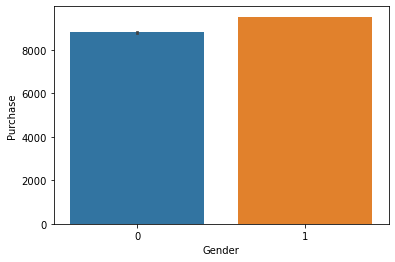

In [22]:
sns.barplot(y='Purchase', x='Gender', data=data)
plt.show()

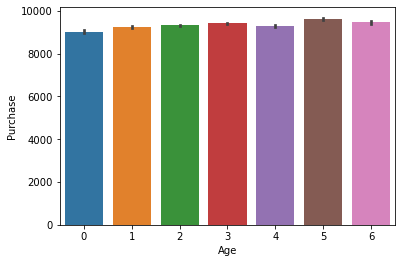

In [23]:
sns.barplot(y='Purchase', x='Age', data=data)
plt.show()

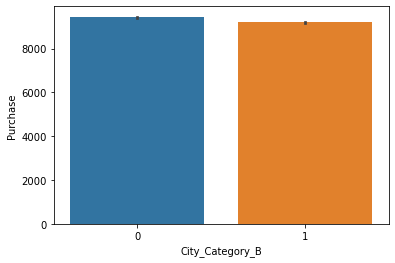

In [24]:
sns.barplot(y='Purchase', x='City_Category_B', data=data)
plt.show()

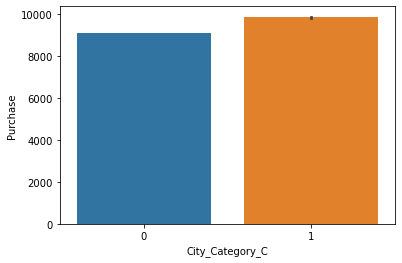

In [25]:
sns.barplot(y='Purchase', x='City_Category_C', data=data)
plt.show()

Нарисуйте матрицу корреляций признаков.

<AxesSubplot:>

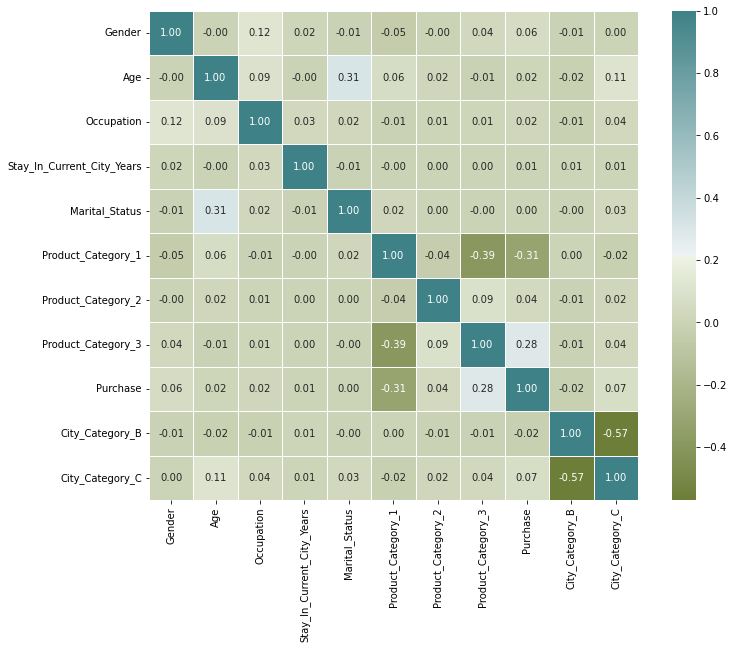

In [26]:
plt.figure(figsize=(12,9))

corr = data.corr()

sns.heatmap(corr,annot=True,linewidths=.5,fmt= '.2f',\
            mask=np.zeros_like(corr, dtype=bool), \
            cmap=sns.diverging_palette(100,200,as_cmap=True), square=True)

# Построение модели

Применим к нашим данным масштабирование: для того, чтобы модель лучше училась, будет неплохо привести все признаки к одному масштабу, а то коэффициенты скакать могут. 

In [46]:
X = data.copy().drop('Purchase', axis=1)

y = data['Purchase']

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=111)

scaler = StandardScaler().fit(Xtrain) # вычисляет mean & sigma
Xtrain = scaler.transform(Xtrain)
Xtest = scaler.transform(Xtest)

regressor = LinearRegression()
regressor.fit(Xtrain, ytrain)

ypred_train = regressor.predict(Xtrain)
ypred_test = regressor.predict(Xtest)
print(ypred_train[:10])

[ 8657.53526846 10521.97188726  6659.56306894 10800.10602988
  9649.69942955  9311.58028534 12384.3484409   8019.38432135
 11459.08274639  8895.99609546]


In [47]:
r2_score(ytrain, ypred_train), r2_score(ytest, ypred_test)

(0.13583618299501476, 0.13494723413739185)

In [48]:
mean_squared_error(ytrain, ypred_train)

21424817.17288901

In [49]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
coefficients

,0,0
0,Gender,209.875978
1,Age,134.821232
2,Occupation,38.842427
3,Stay_In_Current_City_Years,13.967254
4,Marital_Status,-21.325216
5,Product_Category_1,-1194.108936
6,Product_Category_2,52.325436
7,Product_Category_3,926.052241
8,City_Category_B,70.943952
9,City_Category_C,311.443260


Добавим L1 регуляризацию.

In [50]:
regressor2 = Lasso(alpha=10)
regressor2.fit(Xtrain, ytrain)

ypred2 = regressor2.predict(Xtest)

print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
print(regressor2.coef_,'\n')

Scores: 0.13490487370793947 21525738.529546566
[  201.33826482   122.56442987    31.48345366     4.94525355
    -6.98313269 -1187.07216283    43.6808366    920.52678005
    48.54348746   290.35323145] 



Посмотрим, что происходит при разных значениях параметра регуляризации $\alpha$

In [51]:
for a in np.arange(0.1, 100.1, 25):
    regressor2 = Lasso(alpha=a)
    regressor2.fit(Xtrain, ytrain)

    ypred2 = regressor2.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:', r2_score(ytest,ypred2), mean_squared_error(ytest,ypred2))
    print(regressor2.coef_,'\n')

alpha=0.1
Scores: 0.13494727374222637 21524683.510249883
[  209.79057742   134.69878377    38.76884216    13.87708511
   -21.18178276 -1194.03856657    52.23899218   925.9970247
    70.71900358   311.23180496] 

alpha=25.1
Scores: 0.1347137637397442 21530493.825329345
[  188.22565368   108.72270497    20.09589568     0.
    -0.         -1176.46511481    30.54216468   912.15059708
    14.58518785   258.3675509 ] 

alpha=50.1
Scores: 0.13429106221630294 21541011.700408168
[ 1.66628597e+02  8.75700742e+01  8.55532291e-01  0.00000000e+00
 -0.00000000e+00 -1.15841517e+03  8.60093993e+00  8.97917620e+02
  0.00000000e+00  2.29397497e+02] 

alpha=75.1
Scores: 0.1337612278520044 21554195.309520315
[  143.05695947    63.81635889     0.             0.
     0.         -1139.95214537     0.           882.31287341
     0.           208.18754192] 



**Видим, что L1-регуляризация зануляет некоторые веса и таким образом производит отбор признаков.**

Подберем оптимальное значение параметра регуляризации по кросс-валидации

In [52]:
from sklearn.linear_model import LassoCV

n_alphas = 200
alphas = np.linspace(0.1, 10, n_alphas)

lasso_cv = LassoCV(alphas=alphas, 
                   cv=3, random_state=17)
lasso_cv.fit(X, y)

LassoCV(alphas=array([ 0.1       ,  0.14974874,  0.19949749,  0.24924623,  0.29899497,
        0.34874372,  0.39849246,  0.44824121,  0.49798995,  0.54773869,
        0.59748744,  0.64723618,  0.69698492,  0.74673367,  0.79648241,
        0.84623116,  0.8959799 ,  0.94572864,  0.99547739,  1.04522613,
        1.09497487,  1.14472362,  1.19447236,  1.24422111,  1.29396985,
        1.34371859,  1.39346734,  1.44321608,  1.49296482,  1.54271357,
        1.5924...
        8.30854271,  8.35829146,  8.4080402 ,  8.45778894,  8.50753769,
        8.55728643,  8.60703518,  8.65678392,  8.70653266,  8.75628141,
        8.80603015,  8.85577889,  8.90552764,  8.95527638,  9.00502513,
        9.05477387,  9.10452261,  9.15427136,  9.2040201 ,  9.25376884,
        9.30351759,  9.35326633,  9.40301508,  9.45276382,  9.50251256,
        9.55226131,  9.60201005,  9.65175879,  9.70150754,  9.75125628,
        9.80100503,  9.85075377,  9.90050251,  9.95025126, 10.        ]),
        cv=3, random_state=17

In [53]:
lasso_cv.coef_

array([ 482.16976974,  103.49903741,    5.69793977,    9.52760257,
        -47.30585129, -317.88884738,    8.13663821,  148.34973621,
        145.94388277,  660.99699949])

In [54]:
lasso_cv.alpha_

0.1

Обучим модель с найденным параметром регуляризации $\alpha$

In [55]:
regressor2 = Lasso(alpha=lasso_cv.alpha_)

regressor2.fit(Xtrain, ytrain)

ypred2_train = regressor2.predict(Xtrain)
ypred2_test = regressor2.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred2_train), r2_score(ytest,ypred2_test))

Scores: 0.13583617829530026 0.13494727374222637


Добавим L2 регуляризацию.

In [56]:
from sklearn.linear_model import Ridge

for a in np.arange(-10,10.1,2.5):
    regressor3 = Ridge(alpha=a)
    regressor3.fit(Xtrain, ytrain)

    ypred3 = regressor3.predict(Xtest)

    print('alpha={}'.format(a))
    print('Scores:',r2_score(ytest,ypred3), mean_squared_error(ytest,ypred3))
    print(regressor3.coef_)

alpha=-10.0
Scores: 0.13494723761220773 21524684.40925545
[  209.87944783   134.82546587    38.84199631    13.96728677
   -21.32682107 -1194.13179636    52.32433086   926.06457379
    70.95172149   311.45361575]
alpha=-7.5
Scores: 0.1349472367511647 21524684.43068036
[  209.87858039   134.82440742    38.84210403    13.96727861
   -21.32641984 -1194.12608113    52.32460719   926.06149056
    70.94977898   311.45102683]
alpha=-5.0
Scores: 0.13494723588501456 21524684.45223235
[  209.87771296   134.82334899    38.84221175    13.96727046
   -21.32601861 -1194.12036596    52.32488352   926.05840735
    70.94783653   311.44843797]
alpha=-2.5
Scores: 0.1349472350137566 21524684.473911438
[  209.87684554   134.82229057    38.84231947    13.9672623
   -21.32561739 -1194.11465086    52.32515984   926.05532415
    70.94589414   311.44584918]
alpha=0.0
Scores: 0.1349472341373914 21524684.495717604
[  209.87597813   134.82123217    38.84242718    13.96725414
   -21.32521618 -1194.10893582    52.325

**Ridge регрессия не зануляет веса (они могут быть очень маленькими, но ненулевыми).**

Теперь подберем оптимальное a по кросс-валидации.

In [57]:
from sklearn.linear_model import RidgeCV

n_alphas = 200
ridge_alphas = np.logspace(-2, 6, n_alphas)

ridge_cv = RidgeCV(alphas=ridge_alphas, 
                   scoring='neg_mean_squared_error',
                   cv=3)
ridge_cv.fit(X, y)

RidgeCV(alphas=array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5.80522552e-02,
       6.36824994e-02, 6.98587975e-0...
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06]),
        cv=3, scoring='neg_mean_squared_error')

In [58]:
ridge_cv.alpha_

104.73708979594487

In [60]:
regressor3 = Lasso(alpha=ridge_cv.alpha_)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.13366260153612886 0.13289800756422876


Добавим одновременно и L1, и L2 регуляризацию.

У ElasticNet два параметра: alpha и l1_ratio. Используйте ElasticNet со значениями параметров alpha и l1_ratio равными 0.5.

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html

In [61]:
from sklearn.linear_model import ElasticNet

regressor3 = ElasticNet(alpha=0.1, l1_ratio=0.5)

regressor3.fit(Xtrain, ytrain)

ypred3_train = regressor3.predict(Xtrain)
ypred3_test = regressor3.predict(Xtest)

print('Scores:', r2_score(ytrain,ypred3_train), r2_score(ytest,ypred3_test))

Scores: 0.1356611082469401 0.1347654802851732


### Посмотрим на веса, которые присвоила линейная регрессия признакам (regressor.coef_).

In [62]:
#your code here
regressor3.coef_

array([  202.64847369,   126.16651523,    39.56110622,    13.81180241,
         -18.13516321, -1147.08507678,    54.38880854,   899.93047594,
          56.03287073,   291.08328066])

Можно записать эти веса в таблицу рядом с названиями признаков (для удобства).

In [63]:
coefficients = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor3.coef_))], axis = 1)
coefficients

,0,0
0,Gender,202.648474
1,Age,126.166515
2,Occupation,39.561106
3,Stay_In_Current_City_Years,13.811802
4,Marital_Status,-18.135163
5,Product_Category_1,-1147.085077
6,Product_Category_2,54.388809
7,Product_Category_3,899.930476
8,City_Category_B,56.032871
9,City_Category_C,291.083281


In [66]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(LinearRegression(), X, y, cv=3, scoring='r2').mean())

0.13559483384449145


# Задание 2

Поработайте с датасетом affairs. Предскажите значение в колонке affairs по остальным факторам.

1. Сначала проведите разведочный анализ, а именно, исследуйте зависимость таргета от каждого фактора (или пары факторов).

2. Обучите линейную регрессию, посмотрите на качество на кросс-валидации, затем разбейте данные на train и test,
обучите алгоритм на train и сделайте предсказания на train и test, выведите ошибки.

3. Посмотрите на матрицу корреляций факторов и целевой переменной. 
Если есть пары сильно коррелирующих между собой факторов, удалите один из пары.

Если есть факторы, слабо коррелирующие с таргетом, удалите их.

Заново обучите алгоритм на обновленных данных. Как изменилось его качество?

In [ ]:
#your code here

# Задание 3. 

Поработайте с датасетом House Sales in King County. Обратите внимание, что не все признаки в датасете полезны. Целевая переменная - очевидно, price. 

In [ ]:
#your code here